In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing



In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


### Data Understanding

In [15]:
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [17]:
test.head() 

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Seem likes train data set contains Null value on keyword and location columns

let's check how many null values appears on train and test dataset 

In [22]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [23]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [24]:
#train kw has 61, lc has 2533 
#test  kw has 26, lc has 1105 

After I read data informations, It's siad...

Columns
#id - a unique identifier for each tweet
#text - the text of the tweet
#location - the location the tweet was sent from (may be blank)
#keyword - a particular keyword from the tweet (may be blank)

I assumes that location is not necessary to use.
'keyword' is the keys, the word from 'text' make those text become negative or positive,

In [26]:
# let check distribution of text length and traget varieable 

## Explore Data Analysis 

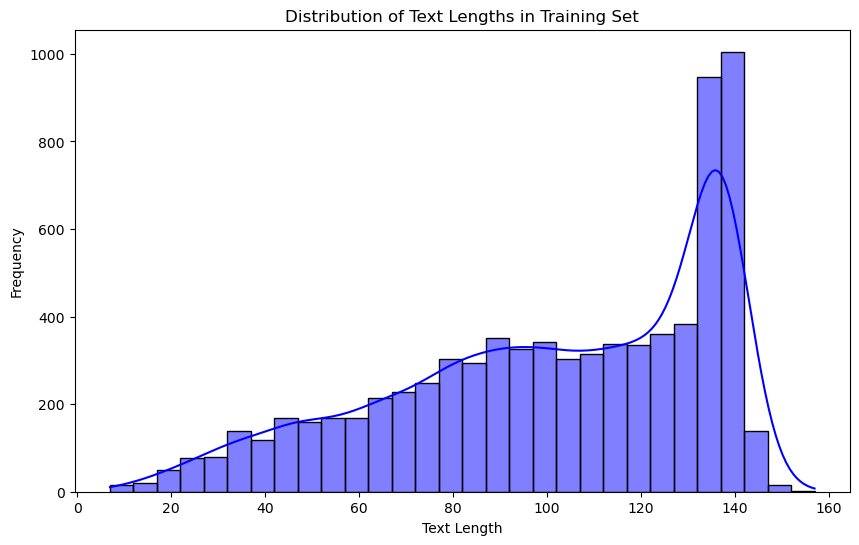

In [41]:
train['text_length'] = train['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths in Training Set')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

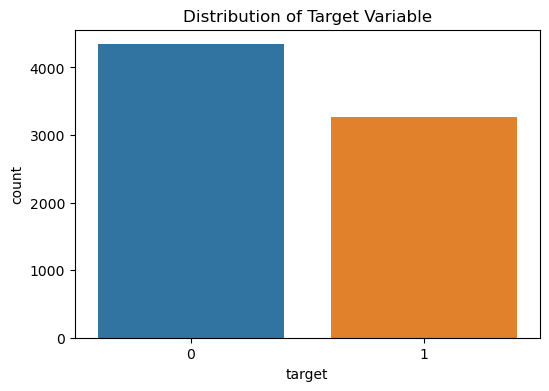

In [42]:
# Diater is 1 
# Not diater is 0 
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train)
plt.title('Distribution of Target Variable')
plt.show()


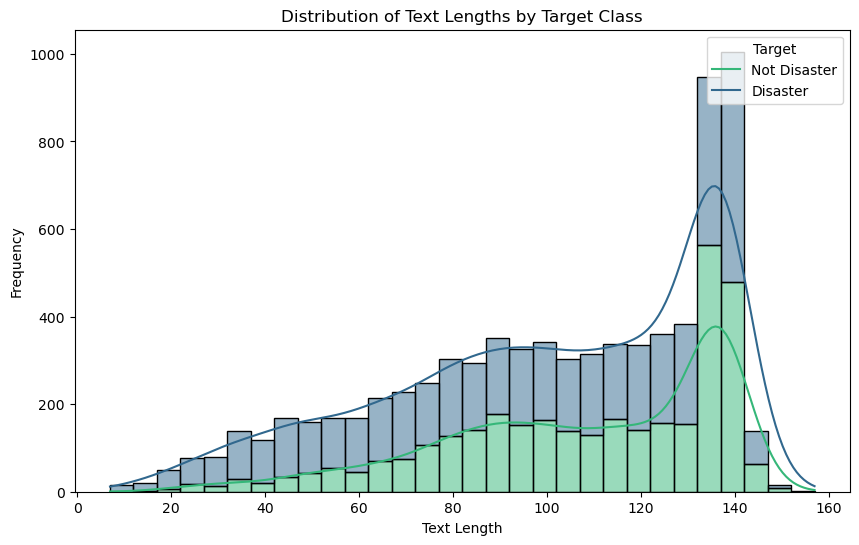

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(x='text_length', hue='target', data=train, bins=30, kde=True, multiple='stack', palette='viridis')
plt.title('Distribution of Text Lengths by Target Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Target', loc='upper right', labels=['Not Disaster', 'Disaster'])
plt.show()


from the graph it's found that Diaster has more frequency on each text length

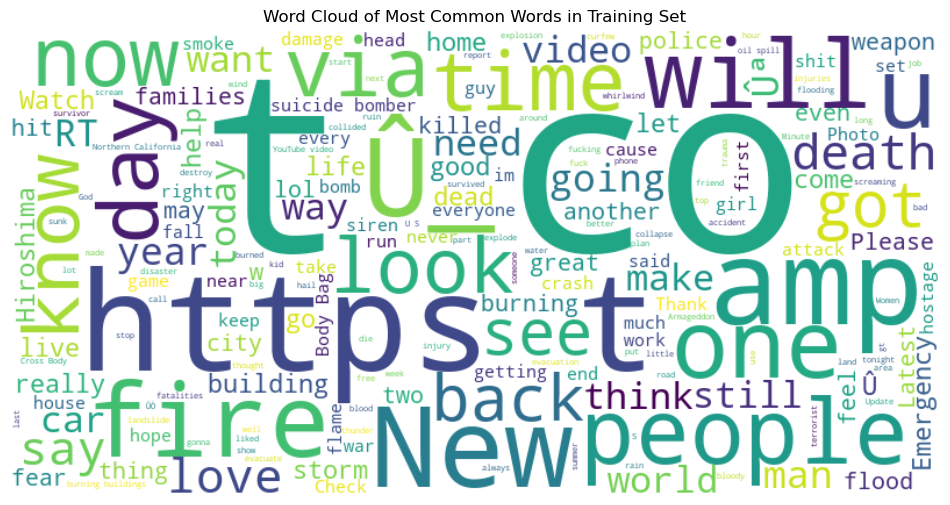

In [44]:
from wordcloud import WordCloud

text_combined = " ".join(train['text'])

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_combined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Training Set')
plt.show()

## Logistic Regression Modeling

In [53]:
#Creating X_train,X_val,y_train,y_val
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train['text'])
train_text_features = tfidf_vectorizer.transform(train['text'])
test_text_features = tfidf_vectorizer.transform(test['text'])

In [55]:
print("Shape of train_text_features:", train_text_features.shape)
print("Example of train_text_features:")
print(train_text_features[:5])  # Displaying the first 5 rows

Shape of train_text_features: (7613, 21637)
Example of train_text_features:
  (0, 19774)	0.24477443310741195
  (0, 18777)	0.1800147670172314
  (0, 18669)	0.10169057350001784
  (0, 15678)	0.3265463550381381
  (0, 14003)	0.25309130456401624
  (0, 13681)	0.11990034967586292
  (0, 12141)	0.2592123351950127
  (0, 7661)	0.41872819867651895
  (0, 6379)	0.2904421828375658
  (0, 5490)	0.41872819867651895
  (0, 2192)	0.18937339953178942
  (0, 1852)	0.3616934826352278
  (0, 1851)	0.20827049400579561
  (1, 16611)	0.48782712843724685
  (1, 16266)	0.48782712843724685
  (1, 13122)	0.31294120486788174
  (1, 11091)	0.35894718133854775
  (1, 7652)	0.30494408465089573
  (1, 7439)	0.2365324860692921
  (1, 3843)	0.385143605810349
  (2, 18971)	0.07551135117473619
  (2, 17022)	0.4927964202944053
  (2, 15940)	0.23769645678338294
  (2, 14612)	0.404089443094737
  (2, 13987)	0.1890144807081105
  :	:
  (2, 2192)	0.24183565736702745
  (2, 1851)	0.13298391419432742
  (3, 20607)	0.37792614340390596
  (3, 15699)	0.44

In [57]:
label_encoder = preprocessing.LabelEncoder()
train_target = label_encoder.fit_transform(train['target'])
X_train, X_val, y_train, y_val = train_test_split(train_text_features, train_target, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
test_predictions = model.predict(test_text_features)


In [60]:
submission = pd.DataFrame({'id': test['id'], 'target': test_predictions})
submission.to_csv('submission1.csv', index=False)